# $$FastText \space Word \space Embeddings \space Visaualization$$

## `01` Import Libraries

In [28]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import strip_multiple_whitespaces, strip_non_alphanum, strip_short
from gensim.utils import tokenize
from gensim.models.fasttext import FastText
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

----------------------------

## `02` Load Data

In [3]:
df = pd.read_json("/kaggle/input/yelp-dataset/yelp_academic_dataset_tip.json", lines=True)
df.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


----------------------------

## `03` Data Preprocessing

### `i` Convert text column into list

In [4]:
text = df['text'].to_list()
text[:5]

['Avengers time with the ladies.',
 'They have lots of good deserts and tasty cuban sandwiches',
 "It's open even when you think it isn't",
 'Very decent fried chicken',
 'Appetizers.. platter special for lunch']

### `ii` Remove white extra space from text

In [5]:
text = [strip_multiple_whitespaces(sentence.strip()) for sentence in text]
text[:5]

['Avengers time with the ladies.',
 'They have lots of good deserts and tasty cuban sandwiches',
 "It's open even when you think it isn't",
 'Very decent fried chicken',
 'Appetizers.. platter special for lunch']

### `iii` Remove all special characters from the text


In [6]:
text = [strip_non_alphanum(sentence) for sentence in text]
text[:5]

['Avengers time with the ladies ',
 'They have lots of good deserts and tasty cuban sandwiches',
 'It s open even when you think it isn t',
 'Very decent fried chicken',
 'Appetizers   platter special for lunch']

### `iii` Remove all single characters from the text


In [7]:
text = [strip_short(sentence, minsize=2) for sentence in text]
text[:5]

['Avengers time with the ladies',
 'They have lots of good deserts and tasty cuban sandwiches',
 'It open even when you think it isn',
 'Very decent fried chicken',
 'Appetizers platter special for lunch']

### `iv` Convert text to lower case


In [8]:
text = [sentence.lower() for sentence in text]
text[:5]

['avengers time with the ladies',
 'they have lots of good deserts and tasty cuban sandwiches',
 'it open even when you think it isn',
 'very decent fried chicken',
 'appetizers platter special for lunch']

### `v` Perform Word tokenization


In [9]:
token_list = [list(tokenize(sentence)) for sentence in text]
token_list[:5]

[['avengers', 'time', 'with', 'the', 'ladies'],
 ['they',
  'have',
  'lots',
  'of',
  'good',
  'deserts',
  'and',
  'tasty',
  'cuban',
  'sandwiches'],
 ['it', 'open', 'even', 'when', 'you', 'think', 'it', 'isn'],
 ['very', 'decent', 'fried', 'chicken'],
 ['appetizers', 'platter', 'special', 'for', 'lunch']]

### `vi` Lemmatization


In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
token_list = [[lemmatizer.lemmatize(token) for token in tokens] for tokens in token_list]
token_list[:5]

[['avenger', 'time', 'with', 'the', 'lady'],
 ['they',
  'have',
  'lot',
  'of',
  'good',
  'desert',
  'and',
  'tasty',
  'cuban',
  'sandwich'],
 ['it', 'open', 'even', 'when', 'you', 'think', 'it', 'isn'],
 ['very', 'decent', 'fried', 'chicken'],
 ['appetizer', 'platter', 'special', 'for', 'lunch']]

### `vii` Remove stop words from the text


In [12]:
stop_words = set(stopwords.words('english'))

In [13]:
token_list = [[token for token in tokens if token not in stop_words ] for tokens in token_list]
token_list[:5]

[['avenger', 'time', 'lady'],
 ['lot', 'good', 'desert', 'tasty', 'cuban', 'sandwich'],
 ['open', 'even', 'think'],
 ['decent', 'fried', 'chicken'],
 ['appetizer', 'platter', 'special', 'lunch']]

### `viii` Remove words length less than 4 from text

In [14]:
token_list = [[token for token in tokens if len(token) > 3] for tokens in token_list]
token_list[:5]

[['avenger', 'time', 'lady'],
 ['good', 'desert', 'tasty', 'cuban', 'sandwich'],
 ['open', 'even', 'think'],
 ['decent', 'fried', 'chicken'],
 ['appetizer', 'platter', 'special', 'lunch']]

------------------------

## `+` Cleaning Function

We can also use a single function to perform all the previous steps. However, I separated them for elaboration.

In [15]:
def clean_text(sentence):
    # Remove white extra space from text
    sentence = strip_multiple_whitespaces(sentence.strip())
    # Remove all special characters from the text
    sentence = strip_non_alphanum(sentence)
    # Remove all single characters from the text
    sentence = strip_short(sentence, minsize=2)
    # Convert text to lower case
    sentence = sentence.lower()
    # Perform Word tokenization
    tokens = list(tokenize(sentence))
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stop words from the text
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # Remove words length less than 3 from text
    tokens = [token for token in tokens if len(token) > 3]
    
    return tokens

-------------------------


## `04` Train fastText Word Embeddings

In [16]:
embedding_size = 300
window_size = 5
min_word = 5
down_sampling = 1e-2

fast_Text_model = FastText(token_list,
                      vector_size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      workers = 4,
                      sg=1,
                      epochs=100)

--------------------------

## `05` Visualization

### `i` Plotting Fuction

In [32]:
def plot_top_similar(query_word, model, limit=10, color=['maroon', 'blue']):
    embed_dim = model.wv.vectors.shape[1]
    vectors = np.empty((0, embed_dim), dtype='f')
    labels = [query_word]
    types = ['Query Word']
    
    vectors = np.append(vectors, model.wv.__getitem__([query_word]), axis=0)
    
    similar_words = model.wv.most_similar(query_word, topn=limit)
    for word, similarity in similar_words:
        vector = model.wv.__getitem__([word])
        labels.append(word)
        types.append('Similar Words')
        vectors = np.append(vectors, vector, axis=0)
        
    vectors_tsne = TSNE(n_components=2, random_state=42, init='pca').fit_transform(vectors)
    vectors_tsne_df = pd.DataFrame({
        'X': [x for x in vectors_tsne[:, 0]],
        'Y': [y for y in vectors_tsne[:, 1]],
        'label': labels,
        'Type': types
    })
    
    fig = px.scatter(vectors_tsne_df, x='X', y='Y', text='label', color='Type', size_max=60, color_discrete_map={'Query Word': color[0], 'Similar Words': color[1]})
    fig.for_each_trace(lambda t: t.update(textfont_color=t.marker.color, textposition='top right'))
    fig.update_layout(
        height=800,
        title_text=f't-SNE visualization for Top {limit} Similar Words to "{query_word}"'
    )
    
    return fig

### `ii` Visualizing Some Examples

In [40]:
farm_similarity_fig = plot_top_similar("farm", fast_Text_model, 15)
chicken_similarity_fig = plot_top_similar("chicken", fast_Text_model, 10)
playground_similarity_fig = plot_top_similar("playground", fast_Text_model, 30)
family_similarity_fig = plot_top_similar("family", fast_Text_model, 20)

In [34]:
farm_similarity_fig.show()

In [35]:
chicken_similarity_fig.show()

In [37]:
playground_similarity_fig.show()

In [41]:
family_similarity_fig.show()

----------------------------

## `+` Plot Images

In case the plotly plots above are not showing on the saved notebook, Here are the saved images of the plots.

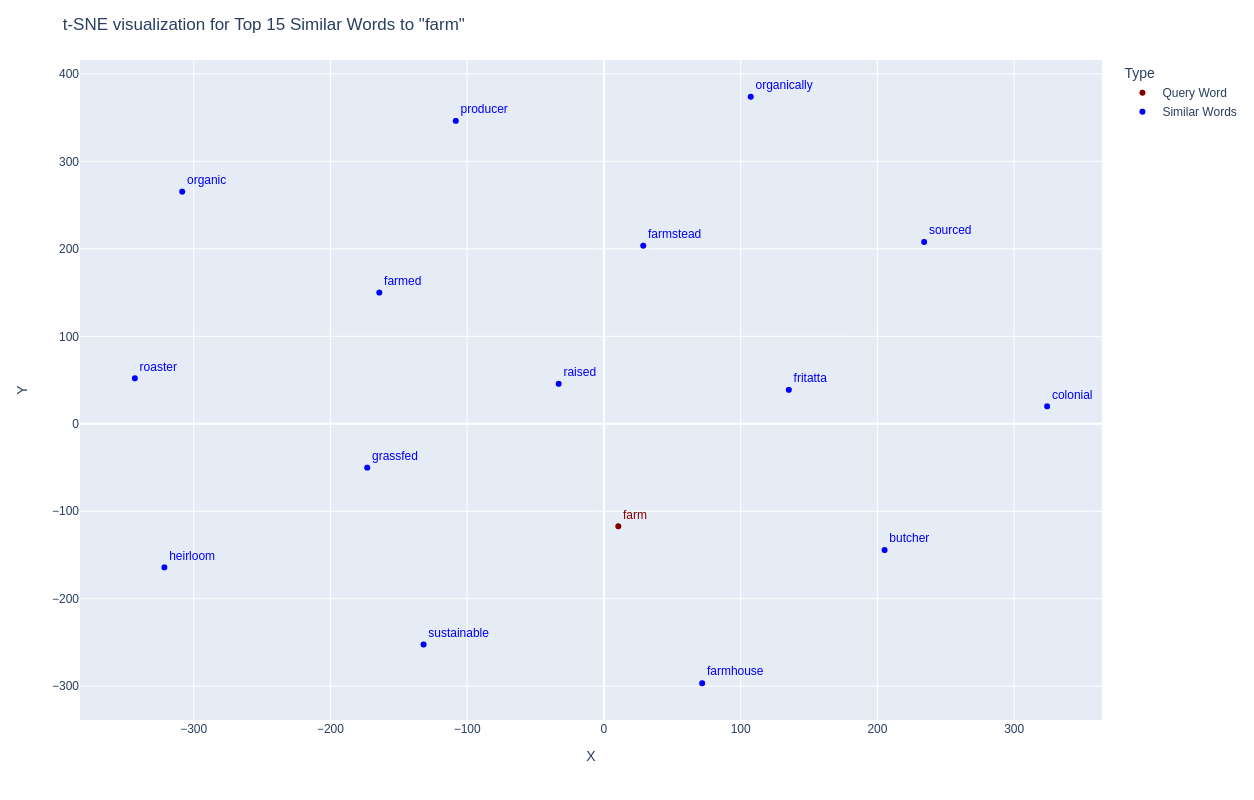

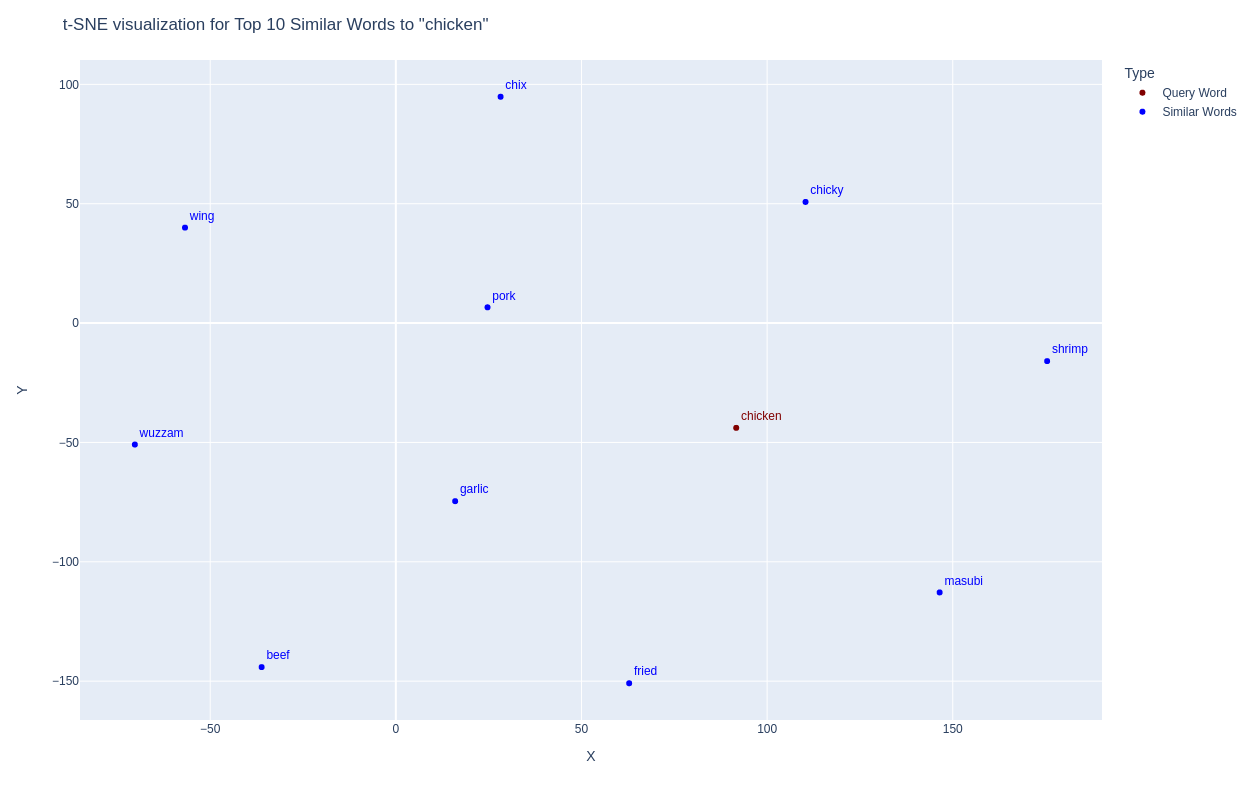

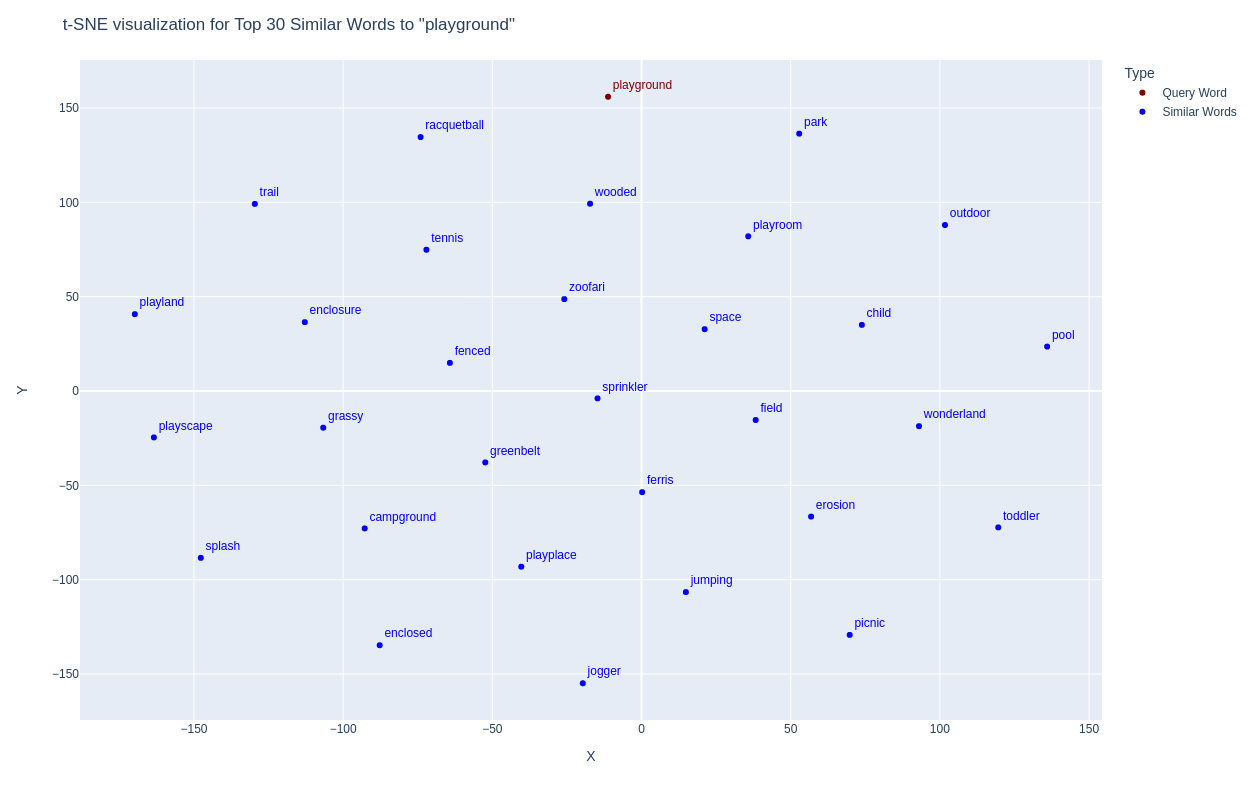

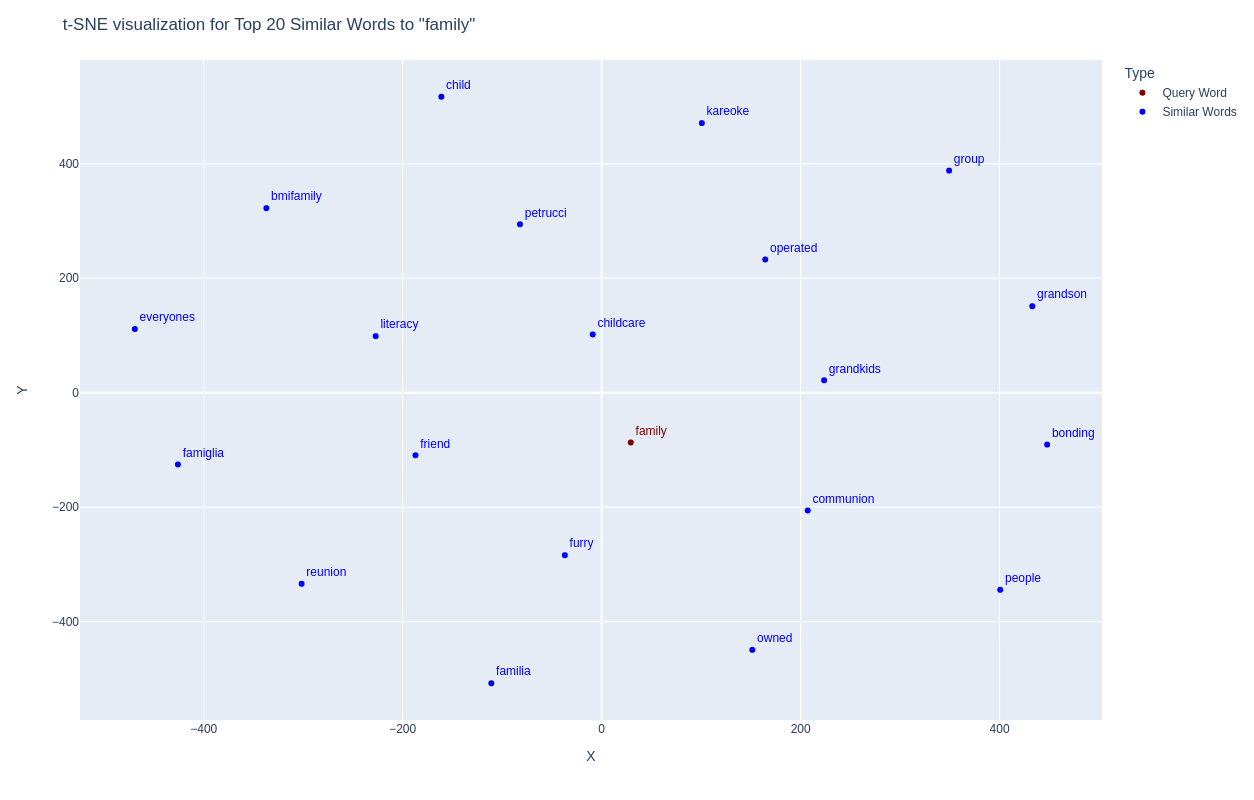

-----------------------

## `06` Model Saving

In [43]:
fast_Text_model.save("model/fastText_model_yelp")

**FastText Model:** <a href="./fastText_model_yelp">Download</a>

------------------------------

**Submitted by: Abdelrahman Ali Eid**